In [1]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# importing all the required basic modules

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
#!pip install shap

In [4]:
# importing few other required modules

import shap
import xgboost

from sklearn.externals import joblib

In [5]:
clf_load = joblib.load('pima.pickle.dat')

In [6]:
# compute SHAP values
explainer = shap.TreeExplainer(clf_load)

In [7]:
# load JS visualization code to notebook
shap.initjs()

In [8]:
fp_data = pd.read_csv("fp.csv")
fn_data = pd.read_csv("fn.csv")

In [9]:
fp_data.head()

Unnamed: 0                                               url  \
0       25378  development-software.goalkeeping-development.com   
1       91985                                    sitescrack.bid   
2      196067                        vinogradnik-dashevskih.com   
3      279980                           inkubator-teknologi.com   
4      341944                    happybirthdaywishes-images.com   

   cert_extendedKeyUsage_other  \
0                        False   
1                        False   
2                        False   
3                        False   
4                        False   

   cert_extendedKeyUsage_TLS_Web_Client_Authentication  cert_keyUsage_other  \
0                                               True                  False   
1                                               True                  False   
2                                               True                  False   
3                                               True                  False   
4                                               True                  False   

   cert_keyUsage_Key_Encipherment  cert_keyUsage_Digital_Signature  \
0                            True                             True   
1                           False                             True   
2                            True                             True   
3                            True                             True   
4                            True                             True   

   cert_muti_domain_cert  cert_wildcard_domain  cert_validty_period_days  ...  \
0                  False                 False                        90  ...   
1                   True                  True                       190  ...   
2                  False                 False                        90  ...   
3                  False                 False                        90  ...   
4                  False                 False                        90  ...   

   edu.cu  dp.ua     yt  com.pa   cool  police.uk  others    web   mail  \
0   False  False  False   False  False      False   False  False  False   
1   False  False  False   False  False      False   False  False  False   
2   False  False  False   False  False      False   False  False  False   
3   False  False  False   False  False      False   False  False  False   
4   False  False  False   False  False      False   False  False  False   

   webmail  
0    False  
1    False  
2    False  
3    False  
4    False  

[5 rows x 552 columns]

In [10]:
data = fp_data.iloc[:,3:]

In [11]:
data.head()

cert_extendedKeyUsage_TLS_Web_Client_Authentication  cert_keyUsage_other  \
0                                               True                  False   
1                                               True                  False   
2                                               True                  False   
3                                               True                  False   
4                                               True                  False   

   cert_keyUsage_Key_Encipherment  cert_keyUsage_Digital_Signature  \
0                            True                             True   
1                           False                             True   
2                            True                             True   
3                            True                             True   
4                            True                             True   

   cert_muti_domain_cert  cert_wildcard_domain  cert_validty_period_days  \
0                  False                 False                        90   
1                   True                  True                       190   
2                  False                 False                        90   
3                  False                 False                        90   
4                  False                 False                        90   

   cert_num_domains  cert_num_distinct_domains  cert_age  ...  edu.cu  dp.ua  \
0                 1                          1       309  ...   False  False   
1                83                         42       328  ...   False  False   
2                 2                          1       325  ...   False  False   
3                 6                          1       319  ...   False  False   
4                 3                          1       181  ...   False  False   

      yt  com.pa   cool  police.uk  others    web   mail  webmail  
0  False   False  False      False   False  False  False    False  
1  False   False  False      False   False  False  False    False  
2  False   False  False      False   False  False  False    False  
3  False   False  False      False   False  False  False    False  
4  False   False  False      False   False  False  False    False  

[5 rows x 549 columns]

In [12]:
# compute SHAP values
shap_values = explainer.shap_values(data)

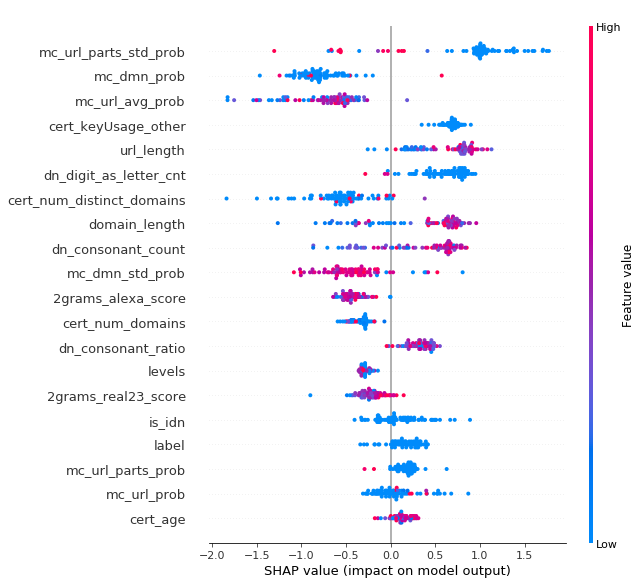

In [13]:
shap.summary_plot(shap_values, data)

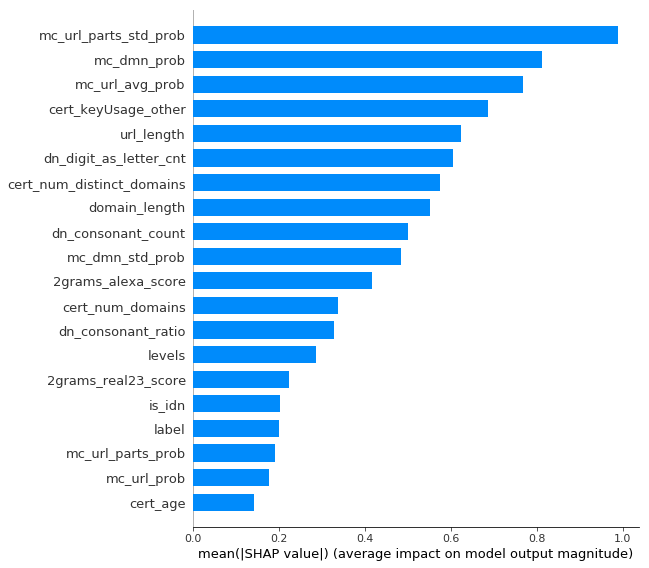

In [14]:
shap.summary_plot(shap_values, data, plot_type="bar")

In [15]:
shap.initjs()

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], data.iloc[0,:])

In [16]:
shap.initjs()

# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, data)

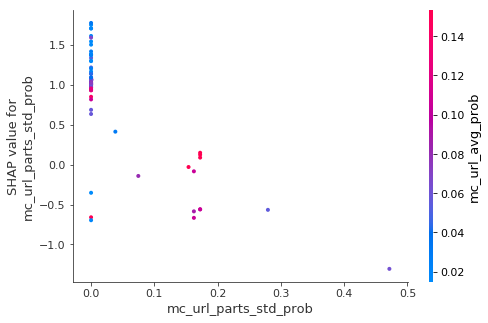

In [17]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("mc_url_parts_std_prob", shap_values, data)

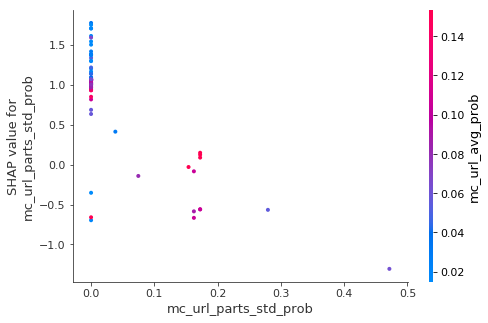

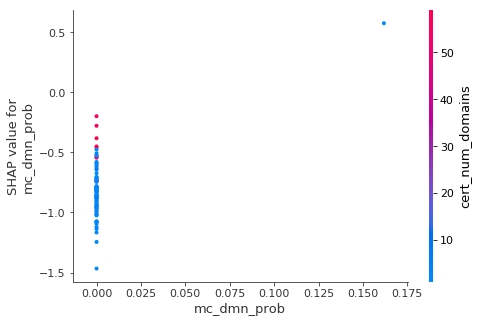

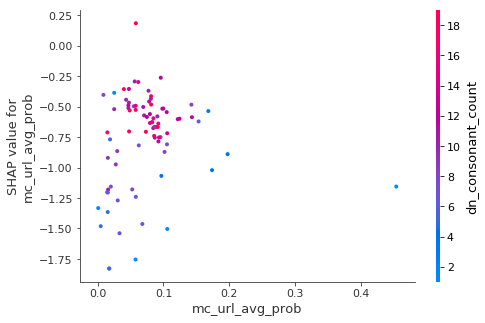

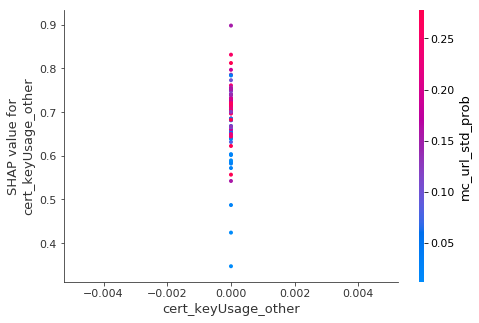

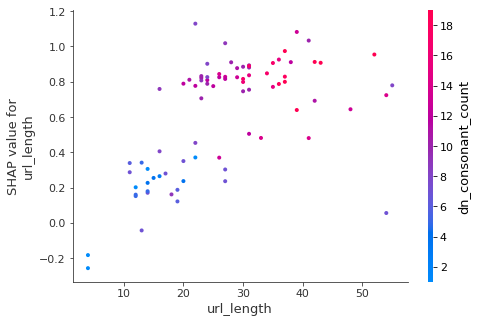

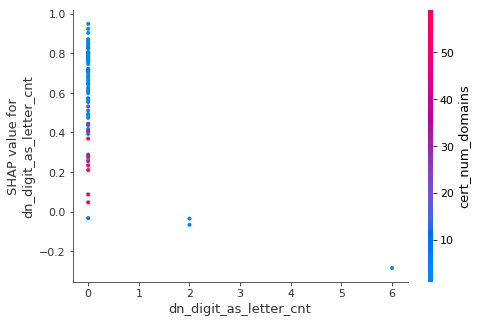

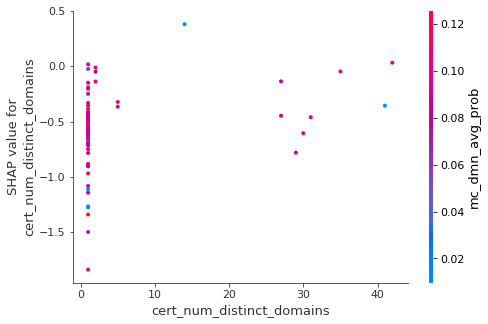

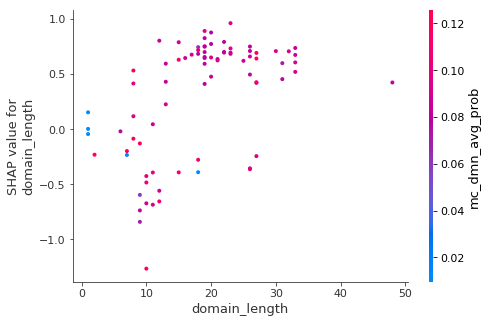

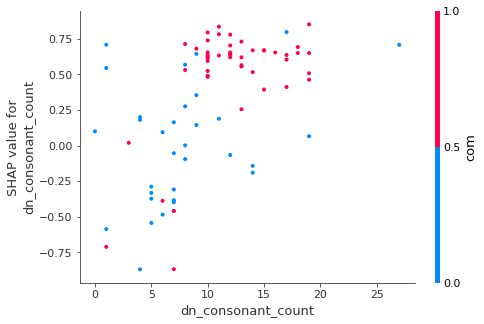

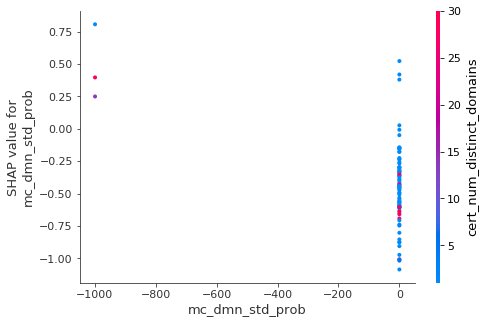

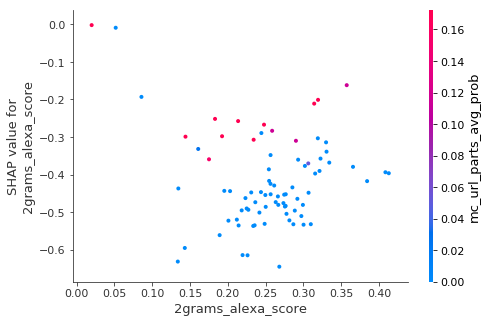

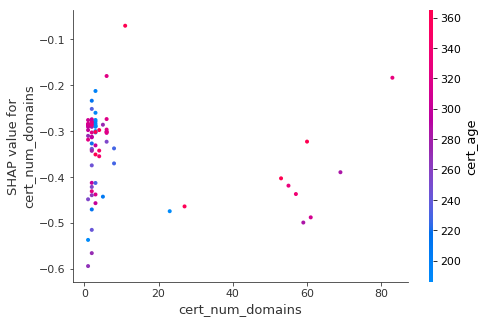

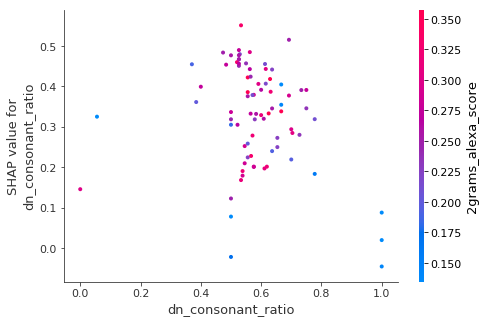

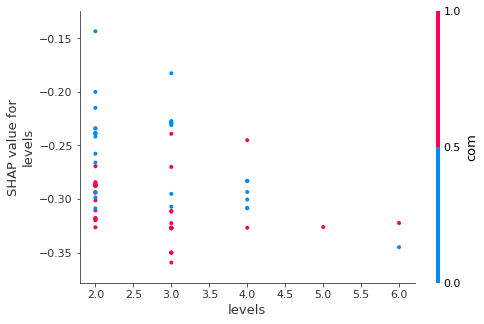

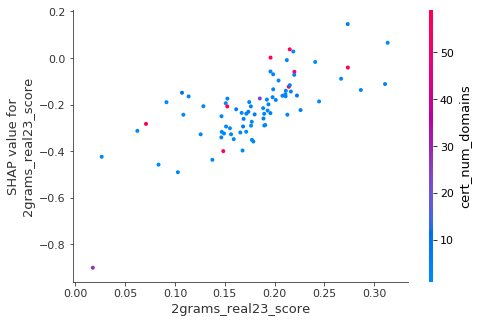

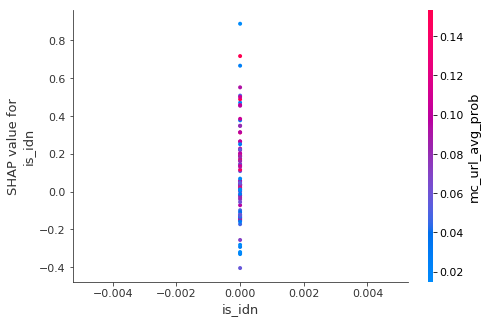

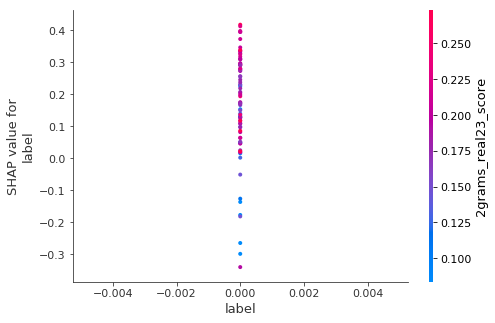

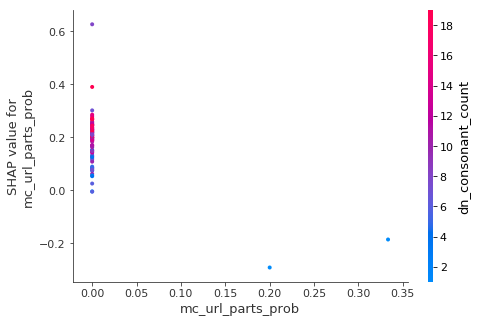

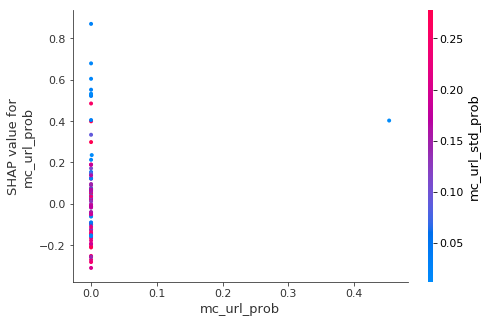

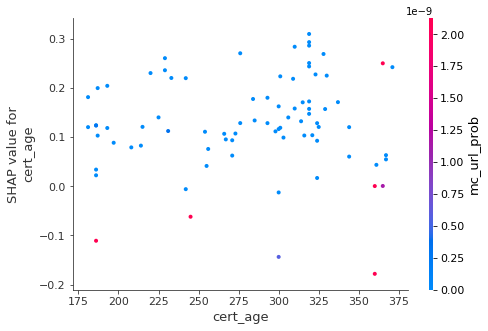

In [18]:
# sort the features indexes by their importance in the model
# (sum of SHAP value magnitudes over the validation dataset)
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))

# make SHAP plots of the three most important features
for i in range(20):
    shap.dependence_plot(top_inds[i], shap_values, data)

In [19]:
fn_data.head()

Unnamed: 0                             url  cert_extendedKeyUsage_other  \
0         938                      trycoba.uk                        False   
1        1754      pitchinside.saversites.com                        False   
2        4718  webdisk.personalmasterynow.com                        False   
3        9366      runners-cache-5.gitlab.com                        False   
4        9444           webdisk.techkesho.com                        False   

   cert_extendedKeyUsage_TLS_Web_Client_Authentication  cert_keyUsage_other  \
0                                               True                  False   
1                                               True                  False   
2                                               True                  False   
3                                               True                  False   
4                                               True                  False   

   cert_keyUsage_Key_Encipherment  cert_keyUsage_Digital_Signature  \
0                            True                             True   
1                            True                             True   
2                            True                             True   
3                            True                             True   
4                            True                             True   

   cert_muti_domain_cert  cert_wildcard_domain  cert_validty_period_days  ...  \
0                  False                 False                        90  ...   
1                  False                 False                        90  ...   
2                   True                 False                        90  ...   
3                  False                 False                       365  ...   
4                  False                 False                        90  ...   

   edu.cu  dp.ua     yt  com.pa   cool  police.uk  others    web   mail  \
0   False  False  False   False  False      False   False  False  False   
1   False  False  False   False  False      False   False  False  False   
2   False  False  False   False  False      False   False   True  False   
3   False  False  False   False  False      False   False  False  False   
4   False  False  False   False  False      False   False   True  False   

   webmail  
0    False  
1    False  
2    False  
3    False  
4    False  

[5 rows x 552 columns]

In [20]:
data = fn_data.iloc[:,3:]

In [21]:
data.head()

cert_extendedKeyUsage_TLS_Web_Client_Authentication  cert_keyUsage_other  \
0                                               True                  False   
1                                               True                  False   
2                                               True                  False   
3                                               True                  False   
4                                               True                  False   

   cert_keyUsage_Key_Encipherment  cert_keyUsage_Digital_Signature  \
0                            True                             True   
1                            True                             True   
2                            True                             True   
3                            True                             True   
4                            True                             True   

   cert_muti_domain_cert  cert_wildcard_domain  cert_validty_period_days  \
0                  False                 False                        90   
1                  False                 False                        90   
2                   True                 False                        90   
3                  False                 False                       365   
4                  False                 False                        90   

   cert_num_domains  cert_num_distinct_domains  cert_age  ...  edu.cu  dp.ua  \
0                 2                          1       262  ...   False  False   
1                15                          1       187  ...   False  False   
2                 8                          2       233  ...   False  False   
3                 2                          1       213  ...   False  False   
4                 6                          1       369  ...   False  False   

      yt  com.pa   cool  police.uk  others    web   mail  webmail  
0  False   False  False      False   False  False  False    False  
1  False   False  False      False   False  False  False    False  
2  False   False  False      False   False   True  False    False  
3  False   False  False      False   False  False  False    False  
4  False   False  False      False   False   True  False    False  

[5 rows x 549 columns]

In [22]:
# compute SHAP values
shap_values = explainer.shap_values(data)

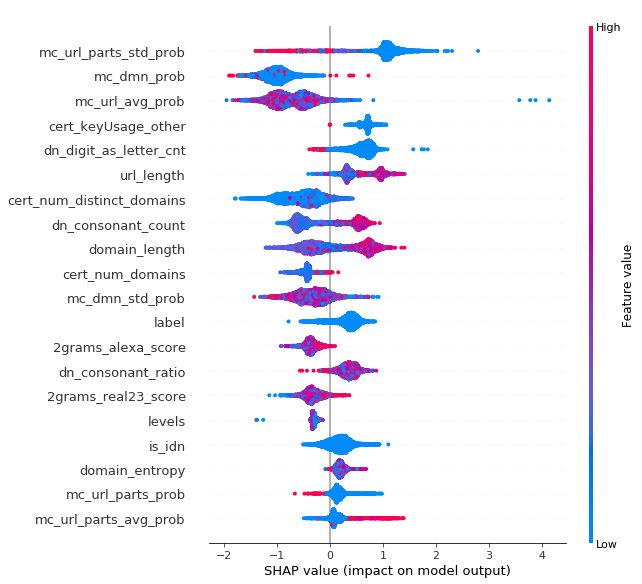

In [23]:
shap.summary_plot(shap_values, data)

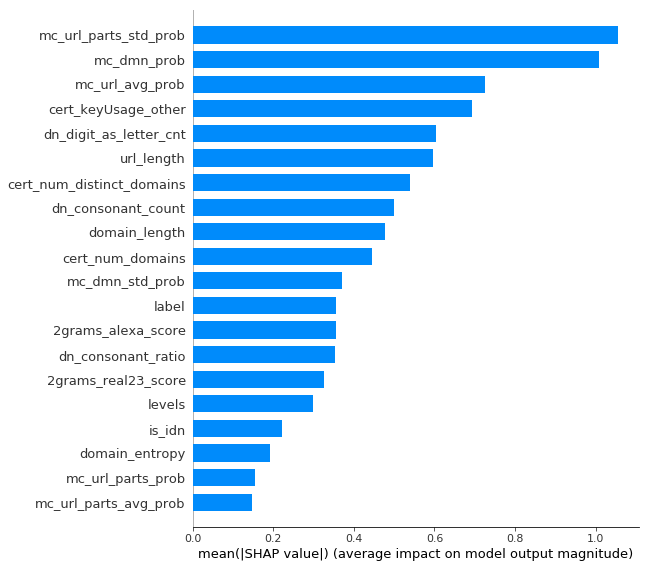

In [24]:
shap.summary_plot(shap_values, data, plot_type="bar")

In [25]:
shap.initjs()

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], data.iloc[0,:])

In [26]:
shap.initjs()

# visualize the training set predictions
#shap.force_plot(explainer.expected_value, shap_values, data)

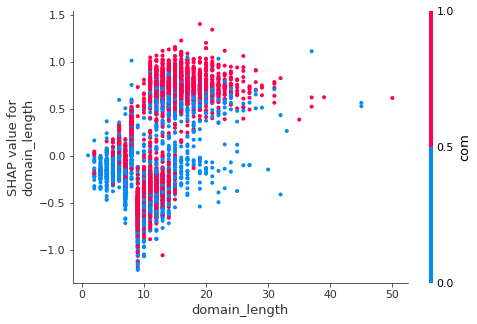

In [30]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("domain_length", shap_values, data)

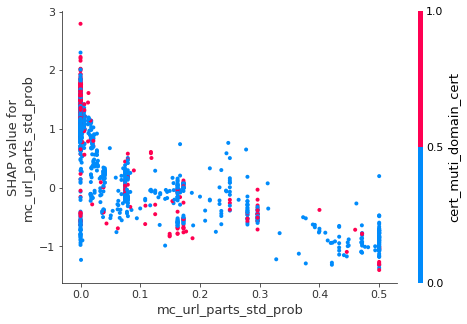

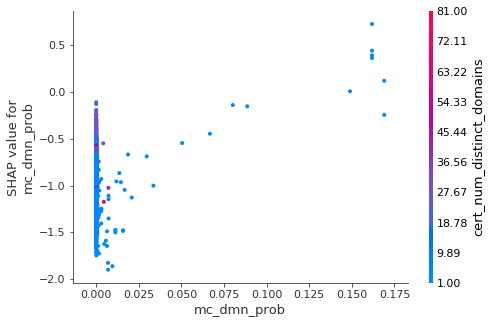

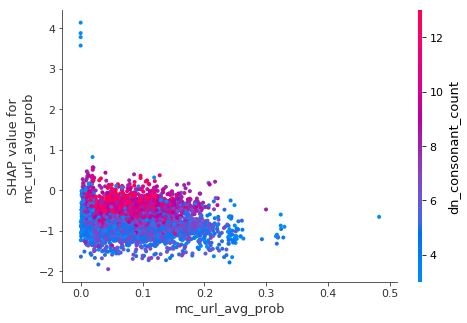

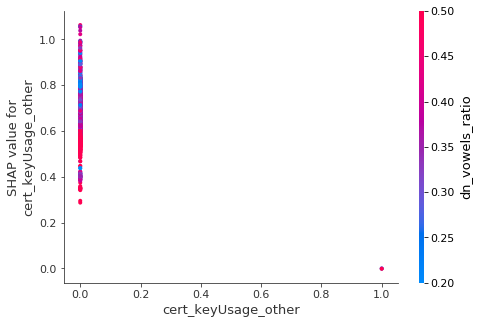

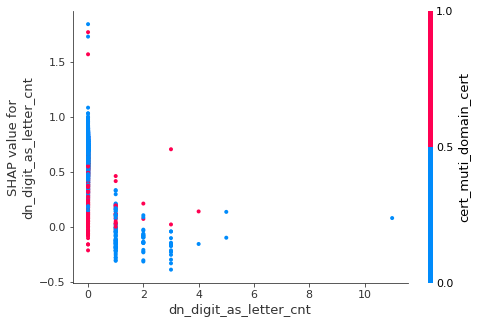

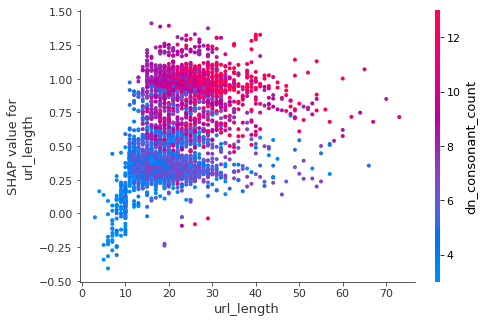

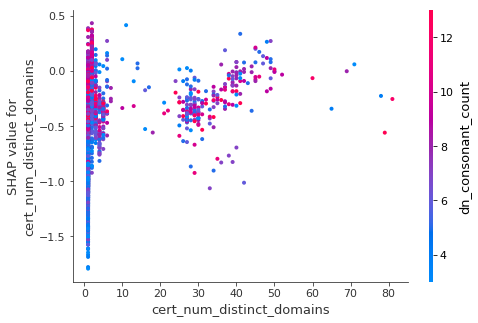

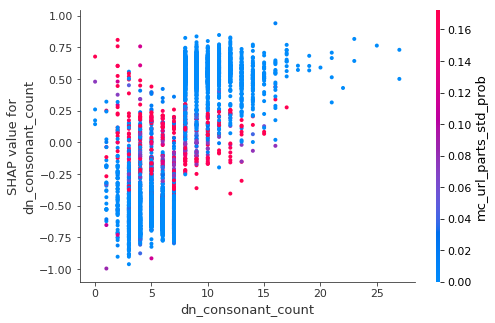

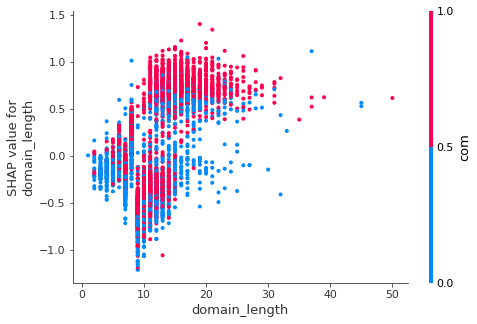

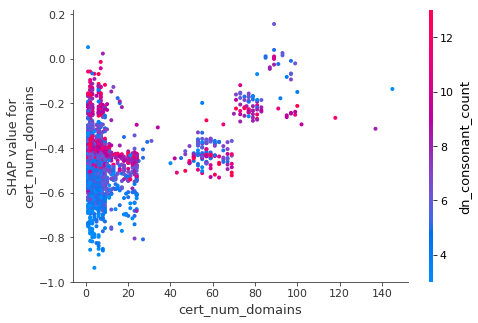

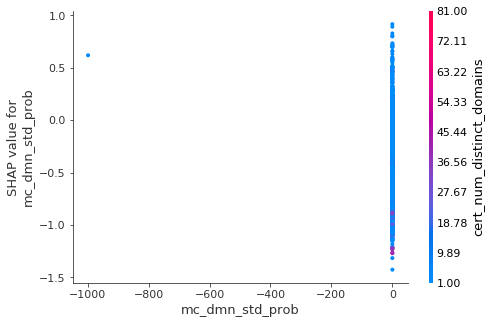

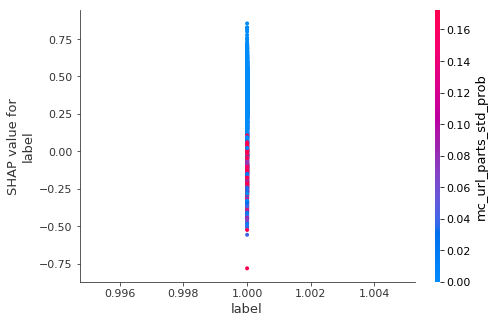

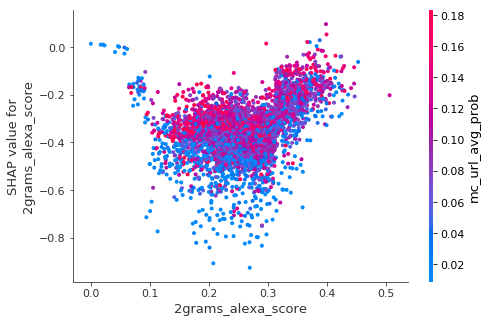

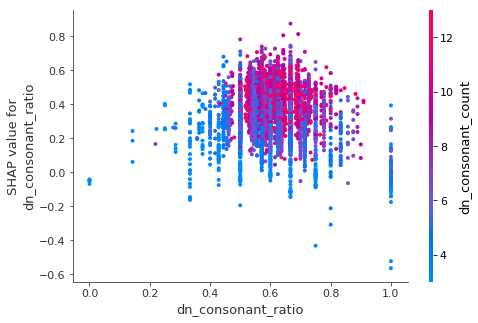

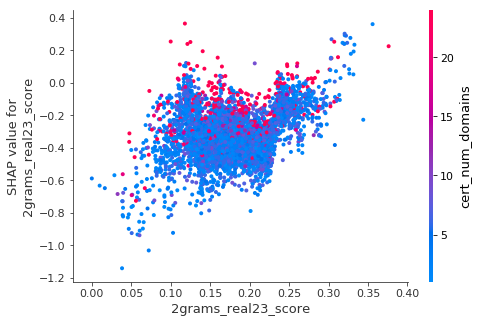

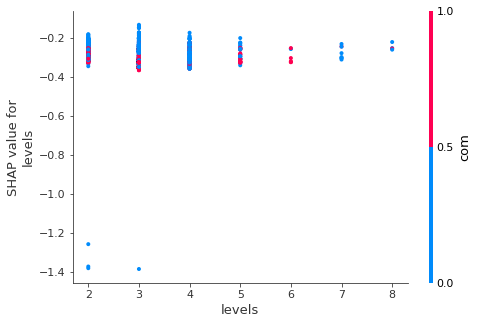

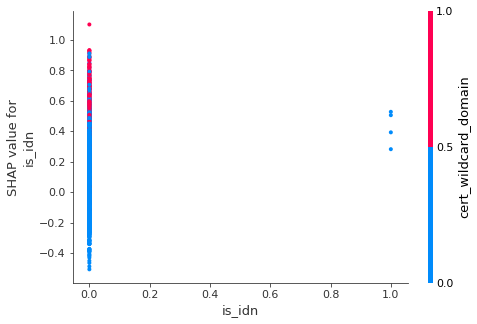

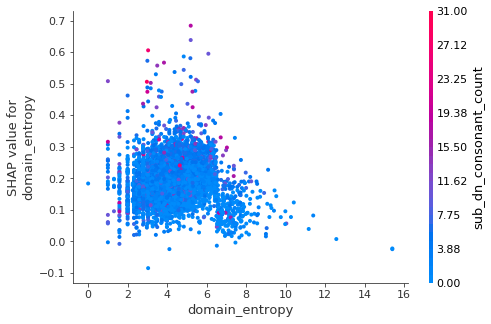

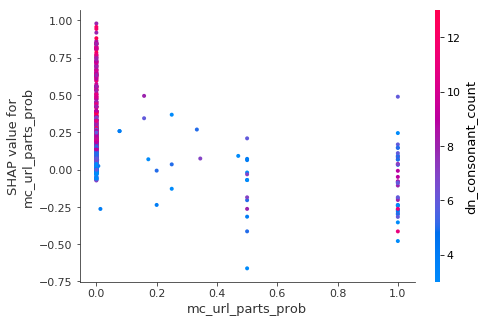

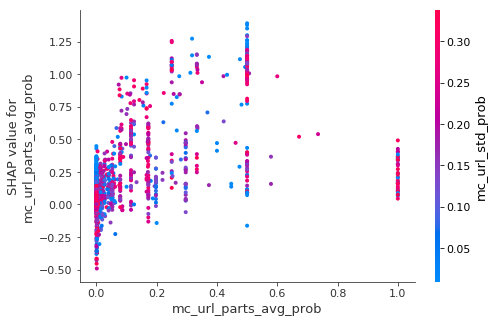

In [28]:
# sort the features indexes by their importance in the model
# (sum of SHAP value magnitudes over the validation dataset)
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))

# make SHAP plots of the three most important features
for i in range(20):
    shap.dependence_plot(top_inds[i], shap_values, data)